## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)

In [2]:
# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata_df,study_results_df, how="inner", on="Mouse ID")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
combined_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata_df=combined_data.drop([combined_data.index[908],combined_data.index[910],
                                 combined_data.index[912],combined_data.index[914],
                                 combined_data.index[916]])

In [6]:
# Checking the number of mice in the clean DataFrame.
cleandata_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_mean=pd.DataFrame(cleandata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary_mean=summary_mean.rename(columns={"Tumor Volume (mm3)": "mean"})

summary_median=pd.DataFrame(cleandata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summary_median=summary_median.rename(columns={"Tumor Volume (mm3)": "median"})

summary_var=pd.DataFrame(cleandata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary_var=summary_var.rename(columns={"Tumor Volume (mm3)": "variance"})

summary_std=pd.DataFrame(cleandata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary_std=summary_std.rename(columns={"Tumor Volume (mm3)": "standard deviation"})


summary_sem=pd.DataFrame(cleandata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
summary_sem=summary_sem.rename(columns={"Tumor Volume (mm3)": "SEM"})



In [8]:
summary_df=pd.merge(summary_mean,summary_median, how="inner", on="Drug Regimen")


In [9]:
summary_df=pd.merge(summary_df,summary_var, how="inner", on="Drug Regimen")
summary_df

,mean,median,variance
Drug Regimen,,,
Capomulin,40.675741,41.557809,24.947764
Ceftamin,52.591172,51.776157,39.290177
Infubinol,52.884795,51.820584,43.128684
Ketapril,55.235638,53.698743,68.553577
Naftisol,54.331565,52.509285,66.173479
Placebo,54.033581,52.288934,61.168083
Propriva,52.382993,50.783528,43.220205
Ramicane,40.216745,40.673236,23.486704
Stelasyn,54.233149,52.431737,59.450562


In [10]:
summary_df=pd.merge(summary_df,summary_std, how="inner", on="Drug Regimen")
summary_df

,mean,median,variance,standard deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.382993,50.783528,43.220205,6.574208
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [11]:
summary_df=pd.merge(summary_df,summary_sem, how="inner", on="Drug Regimen")
summary_df

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_ag=cleandata_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":["mean", np.median,"var","std","sem"]})

# Using the aggregation method, produce the same summary statistics in a single line
summary_ag

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

<Figure size 432x288 with 0 Axes>

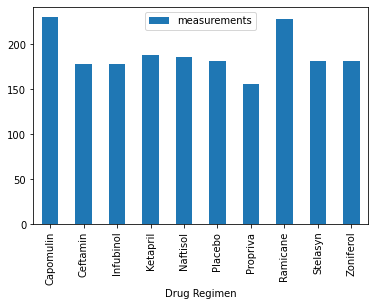

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_df=pd.DataFrame(cleandata_df.groupby("Drug Regimen")['Mouse ID'].count())
measurements_df=measurements_df.rename(columns={"Mouse ID": "measurements"})
measurements_df
plt.figure()
measurements_df.plot.bar()

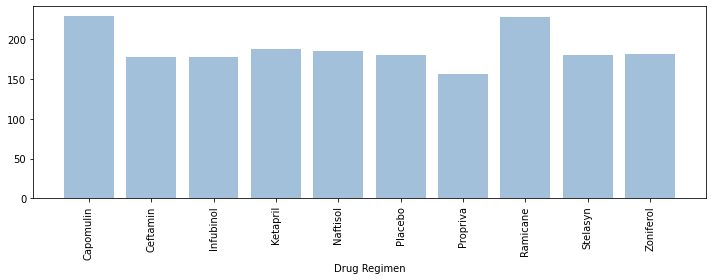

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis=measurements_df.index
plt.figure(figsize=(10,4))
plt.bar(x_axis,measurements_df['measurements'], color= 'steelblue', alpha=0.5)
plt.xticks(x_axis, measurements_df.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.tight_layout()
plt.show()

array([<AxesSubplot:ylabel='Mouse ID'>], dtype=object)

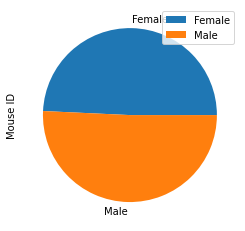

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_distribution=pd.DataFrame(cleandata_df.groupby("Sex")['Mouse ID'].count())
sex_distribution.plot.pie(subplots=True, figsize=(6, 4))

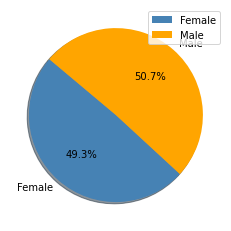

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution_list=sex_distribution['Mouse ID'].values.tolist()
labels=sex_distribution.index.values.tolist()
colors = ["steelblue", "orange"]
plt.pie(distribution_list, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.legend()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleandata_df.loc[cleandata_df.groupby(["Mouse ID"])["Timepoint"].idxmax()] 
last_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
1862,z435,Propriva,Female,12,26,10,48.710661,0
84,z578,Ramicane,Male,11,16,45,30.638696,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments==cleandata_df['Drug Regimen'].unique().tolist()
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for idx, value in last_timepoint.iterrows():
    for i in treatments:
        if i in value['Drug Regimen']:
            tumor_vol.append(value['Tumor Volume (mm3)'])
        
    # add subset 
volumen_=last_timepoint[last_timepoint['Drug Regimen'].isin(treatments)]
    
    # Determine outliers using upper and lower bounds

quartiles = volumen_['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of Tumor Volume (mm3) is: 37.1877438025
The upper quartile of Tumor Volume (mm3) is: 59.930261755
The interquartile range of Tumor Volume (mm3) is: 22.742517952499995
The median of Tumor Volume (mm3) is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.


In [19]:
tumor_vol

[67.97341878,
 65.52574285,
 62.99935619,
 38.4076183,
 43.0475426,
 38.81036633,
 57.03186187,
 32.97852192,
 66.08306589,
 38.98287774,
 45.0,
 56.05774909,
 38.93963263,
 55.74282869,
 72.2267309,
 36.3213458,
 38.34200823,
 33.39765251,
 60.96971133,
 37.31123552,
 62.43540402,
 40.65900627,
 60.91876652,
 48.72207785,
 30.48598484,
 37.07402422,
 40.1592203,
 29.12847181,
 47.7846818,
 33.56240217,
 36.37451039,
 67.28962147,
 47.68596303,
 37.31184577,
 38.1251644,
 38.75326548,
 61.84902336,
 31.56046955,
 36.13485243,
 68.92318457,
 22.05012627,
 66.19691151,
 62.11727887,
 67.74866174,
 57.91838132,
 41.48300765,
 46.78453491,
 59.85195552,
 64.29983003,
 38.84687569,
 30.56462509,
 28.43096411,
 47.01036401,
 33.32909778,
 31.09533505,
 60.16518046,
 59.74190064,
 55.62942846,
 45.69933088,
 61.43389223,
 54.65654872,
 64.19234114,
 45.22086888,
 36.56165229,
 46.53920617,
 32.37735684,
 37.22565033,
 43.41938077,
 41.58152074,
 55.65068132,
 23.34359787,
 30.27623175,
 40.72

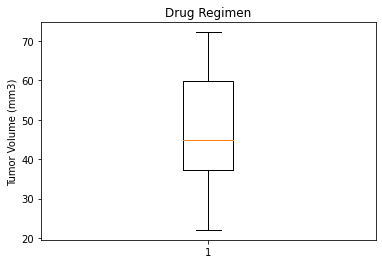

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

In [31]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_=combined_data[(combined_data['Drug Regimen'] =='Capomulin') & (combined_data['Mouse ID'] =='r157') ]
line_plot_

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0
1455,r157,Capomulin,Male,22,25,15,46.539206,0


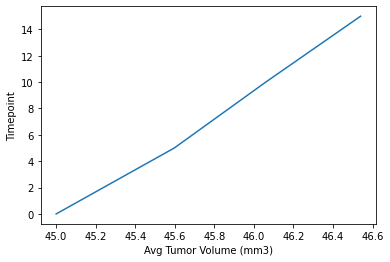

In [35]:
x=line_plot_['Tumor Volume (mm3)']
y=line_plot_['Timepoint']
plt.xlabel('Avg Tumor Volume (mm3)')
plt.ylabel('Timepoint')
plt.plot(x,y)

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot=combined_data[(combined_data['Drug Regimen'] =='Capomulin')]
scatter_plot_=pd.DataFrame(scatter_plot.groupby("Mouse ID").mean())
scatter_plot_

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


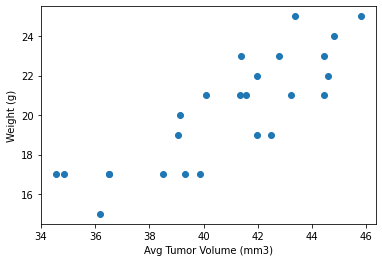

In [30]:
plt.scatter(scatter_plot_['Tumor Volume (mm3)'],scatter_plot_['Weight (g)'])
plt.xlabel('Avg Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708721


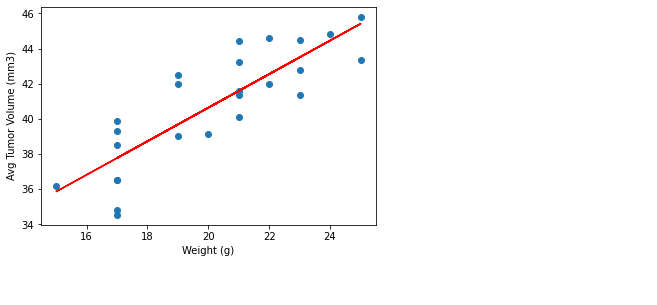

In [63]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
y_values = scatter_plot_['Tumor Volume (mm3)']
x_values = scatter_plot_['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=15,color="red")
plt.ylabel('Avg Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
print(f"The r-squared is: {rvalue**2}")
plt.show()